In [32]:
#5.1

import pandas as pd

train = pd.read_csv("ed-titanic-training.csv", index_col=0)
test = pd.read_csv("ed-titanic-test.csv", index_col=0)

train = train.dropna(subset=["Survived"])
train.loc[train['Age'] > 3, 'Age'] = 4
test.loc[test['Age'] > 3, 'Age'] = 4

train.head(100)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4
3,1,1,0,2,0,3,0,1,2,0,3
4,0,3,1,2,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,1,2,0,1,0,0,1,1,1
96,0,1,1,4,0,3,1,1,1,1,1
97,1,1,1,1,1,3,1,1,2,0,1
98,1,2,0,2,1,2,0,0,2,0,3


<Axes: title={'center': 'Pearson Correlation of Features'}>

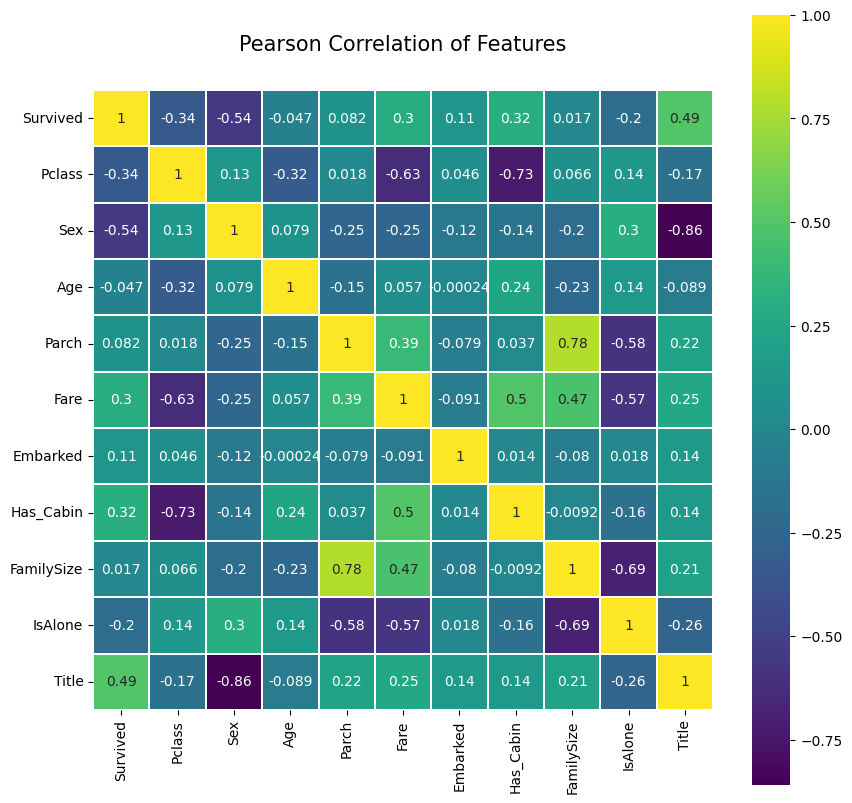

In [33]:
#5.2

import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title("Pearson Correlation of Features", y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor="white", annot=True)

Cechy najbardziej skorelowane z przeżyciem możemy znaleźć poprzez wyszukanie pól o największej wartości w pierwszej kolumnie, czyli:
- Tytuł (0,49)
- Czy posiada kabinę (0,32)
- Opłata za rejs (0,3)
Ewidentnie widać, że majętnych pasażerów darzono większą uwagą podczas akcji ratunkowej i mieli oni większą szansę na przeżycie.

Generalnie cechami najbardziej skorelowanymi ze sobą są:
- Rozmiar rodziny z informacją o posiadaniu dzieci (0,79) - to oczywiste, że rodziny z dziećmi są większe
- Opłata za rejs z posiadaniem kajuty (0,5) - za posiadanie kajuty należało dopłącić
- Tytuł z przeżywalnością (0,49) - jak stwierdziliśmy w poprzednim zstawieniu, wysoko urodzeni mieli większą szansę na przeżycie
- Opłata za rejs z rozmiarem rodziny (0,47) - cena za większą ilość osób siłą rzeczy musiała być większa
- Opłata za rejs z posiadaniem dzieci (0,39) - osoby posiadające dzieci musieli za nie dopłacic, stąd wyższa opłata za rejs

In [34]:
#5.3

titles = {
    1: 'Mr',
    2: 'Master',
    3: 'Mrs',
    4: 'Miss',
    5: 'Rare'
}

grouping = train.groupby(by=['Title'])['Survived'].mean()
grouping.index = titles.values()
grouping

Mr        0.156673
Master    0.575000
Mrs       0.793651
Miss      0.702703
Rare      0.347826
Name: Survived, dtype: float64

Widzimy, że najczęście przeżywały kobiety, zarówno mężatki jak i panny, następnie arystokracja, osoby o rzadkich tytułach już rzadziej, a zwykli mężczyźni w bardzo małym stopniu.

In [35]:
data_x = train.drop('Survived', axis=1)
data_y = train['Survived']

In [36]:
#5.4

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np

search = GridSearchCV(
    DecisionTreeClassifier(),
    {
        'criterion': ['gini'],
        'max_depth': np.arange(1, 15)
    },
    cv=10,
    scoring='accuracy'
)

search.fit(data_x, data_y)
print(search.best_estimator_.max_depth)

3


In [37]:
#5.4

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


search = GridSearchCV(
    DecisionTreeClassifier(),
    {
        'criterion': ['entropy'],
        'max_depth': np.arange(1, 15)
    },
    cv=10,
    scoring='accuracy'
)

search.fit(data_x, data_y)
print(search.best_estimator_.max_depth)

3


Zarówno dla kryterium podziału *gini*, jak i *entropy*, najefektywniejszy podział otrzymamy dla drzewa o głębokości: 3.

In [38]:
#5.5

from sklearn import tree

decision_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_leaf=1)
decision_tree.fit(data_x, data_y)

pred = decision_tree.predict(test)

In [47]:
#5.6

f = open("pred_data_survivers.txt", "w")
f.write(str(pred))
f.flush()
f.close()

pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

[Text(0.5, 0.875, 'Title <= 1.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Died'),
 Text(0.25, 0.625, 'Has_Cabin <= 0.5\nentropy = 0.626\nsamples = 517\nvalue = [436, 81]\nclass = Died'),
 Text(0.125, 0.375, 'FamilySize <= 3.5\nentropy = 0.502\nsamples = 424\nvalue = [377, 47]\nclass = Died'),
 Text(0.0625, 0.125, 'entropy = 0.514\nsamples = 410\nvalue = [363, 47]\nclass = Died'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = Died'),
 Text(0.375, 0.375, 'Fare <= 0.5\nentropy = 0.947\nsamples = 93\nvalue = [59, 34]\nclass = Died'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Died'),
 Text(0.4375, 0.125, 'entropy = 0.971\nsamples = 85\nvalue = [51, 34]\nclass = Died'),
 Text(0.75, 0.625, 'Pclass <= 2.5\nentropy = 0.884\nsamples = 374\nvalue = [113, 261]\nclass = Survived'),
 Text(0.625, 0.375, 'Title <= 4.5\nentropy = 0.526\nsamples = 202\nvalue = [24, 178]\nclass = Survived'),
 Text(0.5625, 0.125, 'entropy = 0

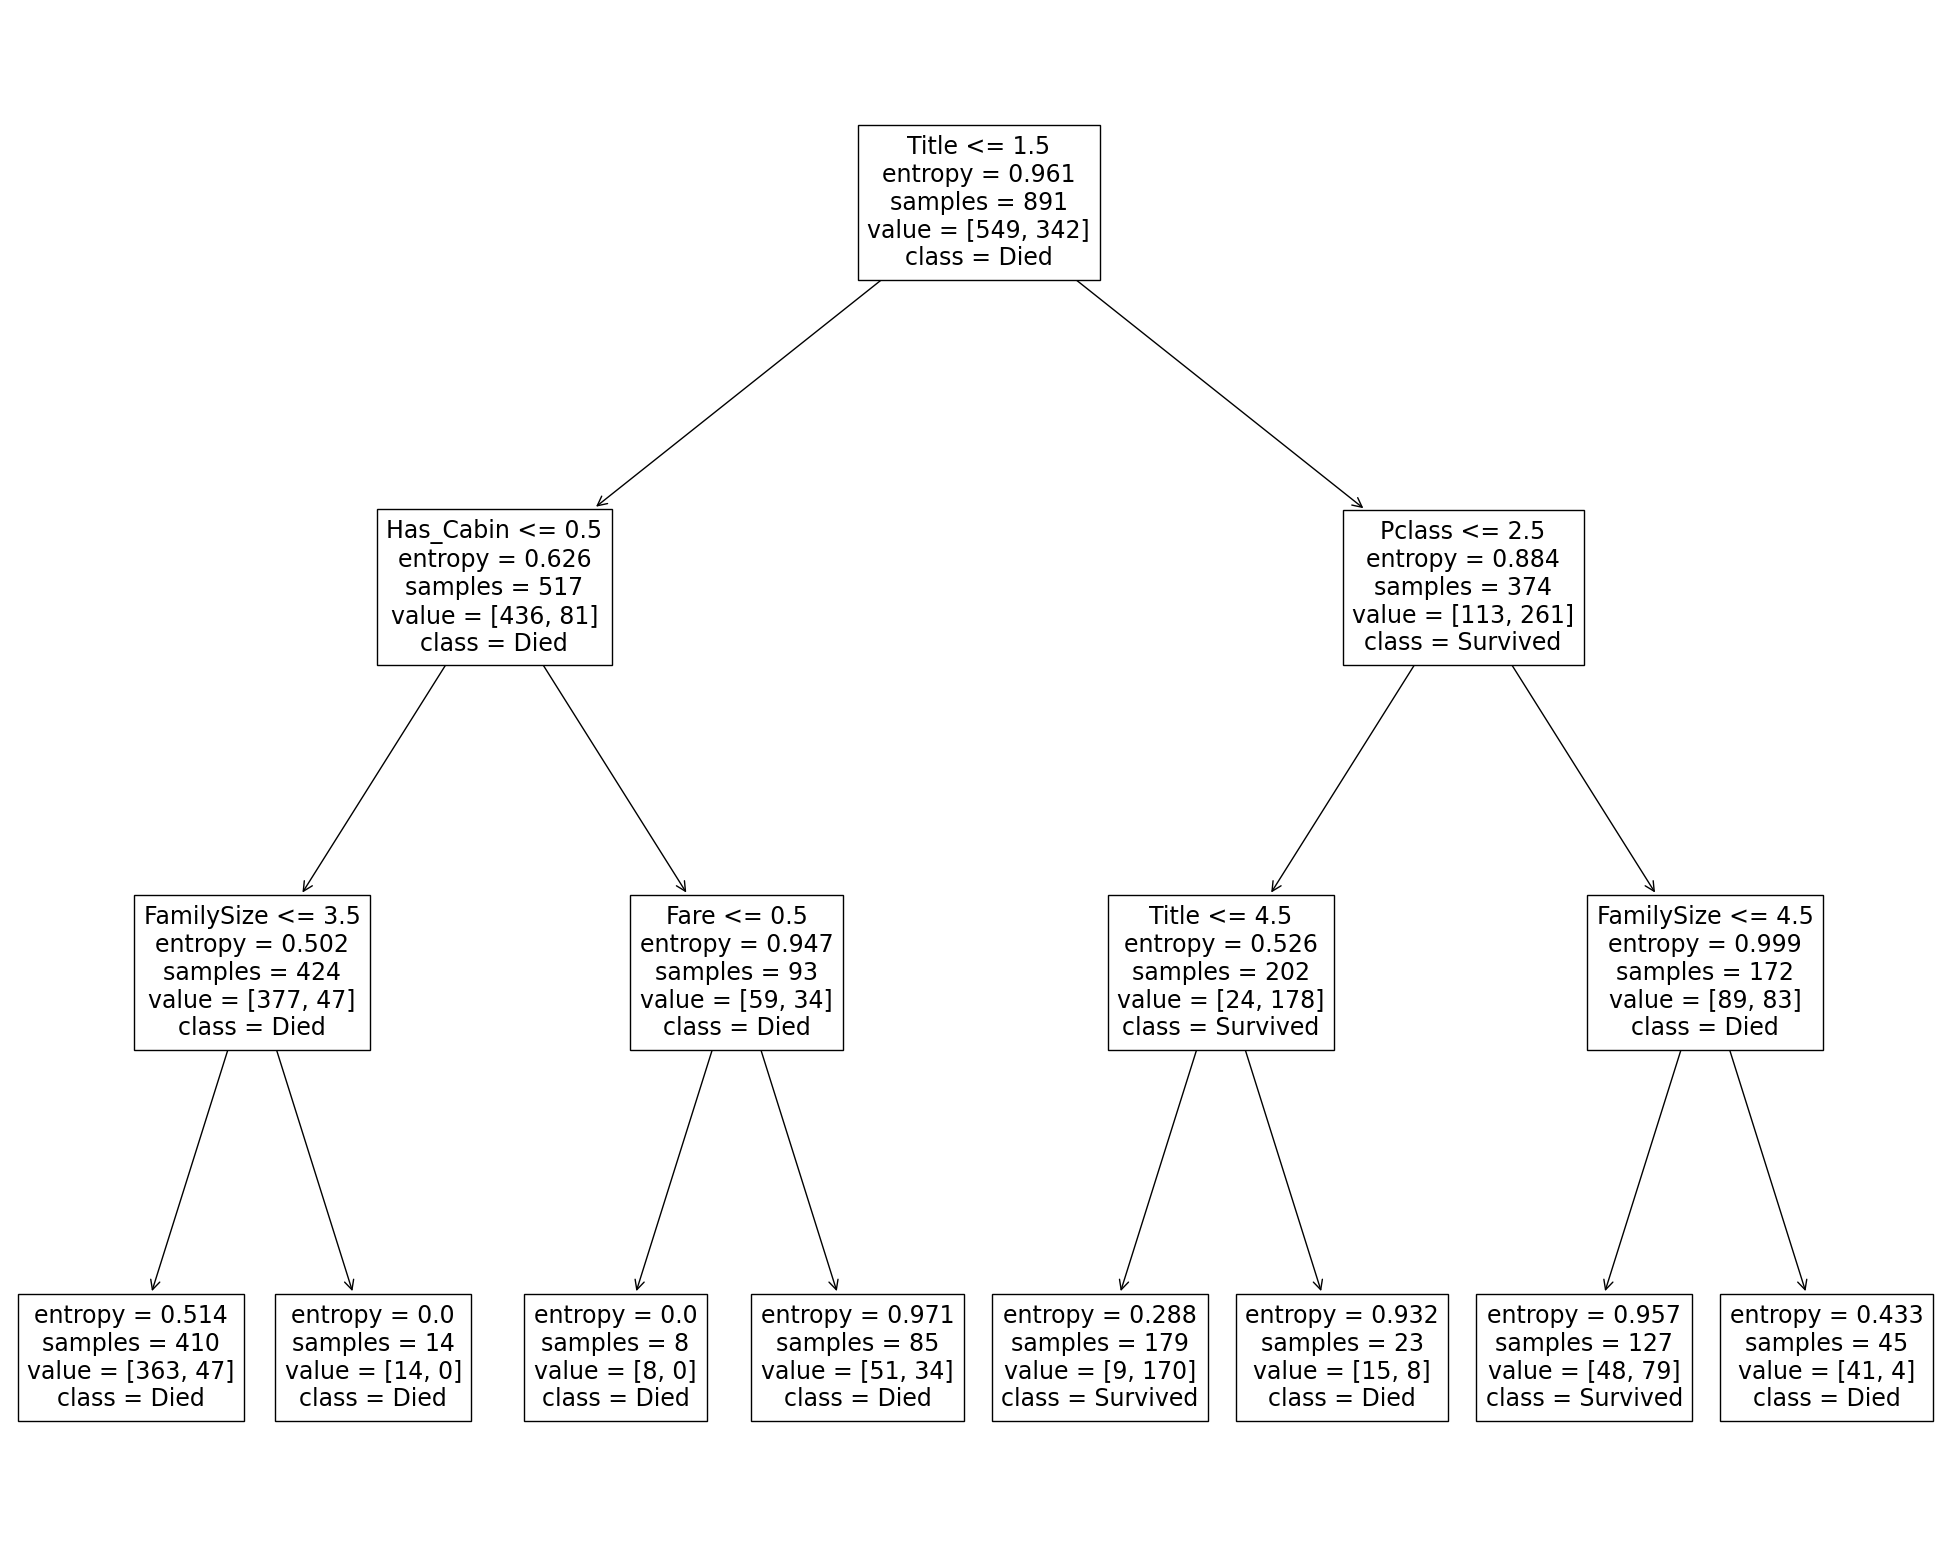

In [40]:
#5.7

from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree=decision_tree, feature_names=data_x.columns, class_names=['Died', 'Survived'])

Powyższy klasyfikator buduje drzewo podziału o głębokości 3 na podstawie doboru cech redukujących entropię zbioru danych.
Przyglądając się powyższemu drzewu widzimy, jakie cechy zostaną użyte do klasyfikacji i jakie wartości odpowiadają za umiejscowienie rekordu w klasyfikującym węźle.  
Jak należało się tego spodziewać, zostały wykorzystane głównie cechy, które w macierzy Pearsona z podpunktu drugiego miały wysoką korelację z przeżywalnością, jak tytuł, posiadanie kabiny oraz opłata za rejs.  
Drzewo wykorzystuje również jedną cechę o niskiej korelacji z przeżywaniem, czyli rozmiar rodziny, oraz jedną cechę wręcz odwrotnie skorelowaną z przeżywalnością, Pclass.

Best: Gini/Entropy:entropy, max_depth:3, min_samples_leaf:1


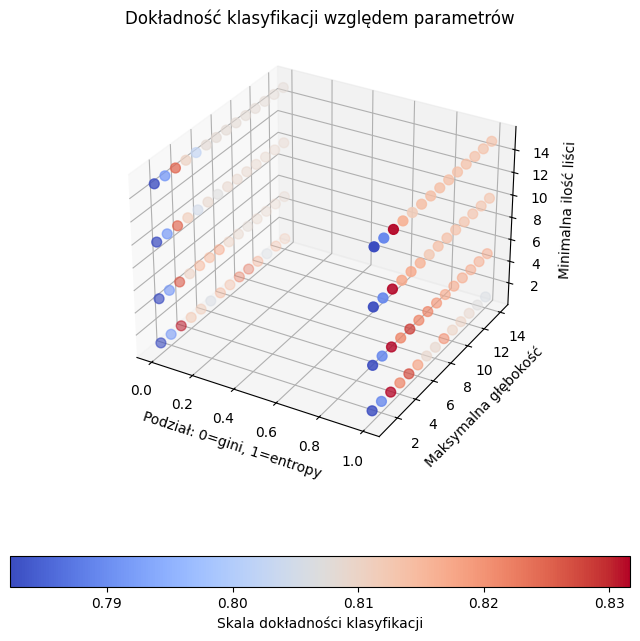

In [41]:
#5.8

import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(data, target):
    accuracies = []
    params = []

    comparison = GridSearchCV(
        DecisionTreeClassifier(),
        {
            'criterion': ['gini', 'entropy'],
            'max_depth': np.arange(1, 15),
            'min_samples_leaf': [1, 5, 10, 15]
        },
        cv=10,
        scoring='accuracy'
    )

    comparison.fit(data, target)
    accuracies = np.array(comparison.cv_results_['mean_test_score'])
    params = np.array(list(map(lambda t: [0 if t['criterion'] == 'gini' else 1, t['max_depth'], t['min_samples_leaf']], comparison.cv_results_['params'])))

    fig = plt.figure(figsize=(8, 8))
    points = fig.add_subplot(111, projection='3d')

    points.scatter(params[:, 0], params[:, 1], params[:, 2], c=accuracies, cmap='coolwarm', s=50)
    points.set_xlabel('Podział: 0=gini, 1=entropy'),
    points.set_ylabel('Maksymalna głębokość')
    points.set_zlabel('Minimalna ilość liści')
    points.set_title('Dokładność klasyfikacji względem parametrów')

    cbar = plt.colorbar(points.collections[0], ax=points, orientation='horizontal')
    cbar.set_label('Skala dokładności klasyfikacji')

    print(f'Best: Gini/Entropy:{comparison.best_estimator_.criterion}, max_depth:{comparison.best_estimator_.max_depth}, min_samples_leaf:{comparison.best_estimator_.min_samples_leaf}')
    plt.show()

plot_comparison(data_x, data_y)

Analizując powyższy wykres porównujący jakość klasyfikacji dla różnych parametrów można wyciągnąć następujące wnioski:
- Kryterium podziału bazujące na entropii daje odrobinę lepsze wyniki, od gini
- Najgorsza dokładność występuje dla drzew o głębokości 1 i 2, ale drzewa o głębokości 3 dają najlepszą dokładność klasyfikacji. Dalsze zwiększanie głębokości drzewa raczej obniża dokładność klasyfikacji
- Minimalna ilość rekordów w liściu wpływa na dokładność klasyfikacji w mniejszym stopniu, niż pozostałe dwa parametry. Przy kryterium podziału gini, najoptymalniejsze są drzewa o małej minimalniej liczbie redordów w liściu, jak 1 dla głębszych drzew, lub 5 dla płytszych. Przy użyciu kryterium redukcji entropii, drzewo powinno mieć co najmniej 5 rekordów w liściu, a zwiększenie tej liczby raczej minimalnie pogorszy dokładność klasyfikacji.

In [42]:
#5.9
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.75, random_state=49)

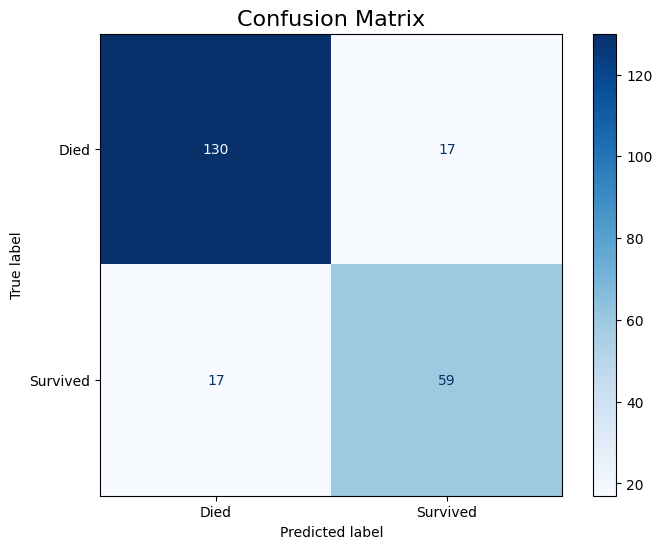

In [46]:
#5.10

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

decision_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_leaf=1)
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
fig, diag = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=diag)
diag.set_title('Confusion Matrix', fontsize=16)
plt.show()

Jak widzimy w powyższej macierzy rozbieżności, dla nowo utworzonego zboioru testowego, klasyfikator trenowany na nowym zbiorze treningowym stanowiącym 75% poprzedniego zbioru treningowego:
- w 130 przypadkach poprawnie ocenił śmierć pasażera
- w 59 przypadkach poprawnie ocenił przeżycie pasażera
- dla 17 ocalałych przewidział śmierć
- dle 17 zmarłych uważał, że powinni przeżyć

Jakość klasyfikatora można wstępnie uznać za zadawalającą, a kolejna sekcja skupia się na dokładnej ocenie dokładności predykcji, jej precyzji oraz parametrach *recall* i *F1-score*

In [44]:
#5.11

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

f1_sc = f1_score(y_test, y_pred)
print(f'F1-score: {f1_sc:.3f}')

precision_avg, recall_avg, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'Avg Precision: {precision_avg:.3f}')
print(f'Avg Recall: {recall_avg:.3f}')


Accuracy: 0.848
F1-score: 0.776
Avg Precision: 0.848
Avg Recall: 0.848


Wszystkie trzy parametry: *accuracy*, *avg precision* o raz *avg recall* wynoszą całkiem wysokie 84,8%, a *F1-score* 77,6%.